In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from randomuniverse import RandomUniverse
%matplotlib inline

### Reading the standard Advertising dataset

In [4]:
df = pd.read_csv('Advertising_adj.csv')

In [5]:
df.head()

,tv,sales
0,230.1,465.26
1,44.5,218.95
2,17.2,195.79
3,151.5,389.47
4,180.8,271.58


In [6]:
def bootstrap(df):
    selectionIndex = np.random.randint(len(df), size = len(df))
    #selectionIndex = np.random.randint(___, size = ___)
    new_df = df.iloc[selectionIndex]
    #new_df = df.iloc[___]
    return new_df


In [7]:
beta0_list, beta1_list = [],[]

for i in range(1000):
    df_new = bootstrap(df)
    
    xmean = df_new.tv.mean()
    ymean = df_new.sales.mean()
    
    beta1 = (((df_new.tv - xmean)*(df_new.sales - ymean)).sum())/(((df_new.tv - xmean)**2).sum())
    beta0 = ymean - beta1*xmean
    
    beta0_list.append(beta0)
    beta1_list.append(beta1)

In [ ]:
### edTest (test_beta) ###
beta0_mean = np.mean(beta0_list)
beta1_mean = np.mean(beta1_list)

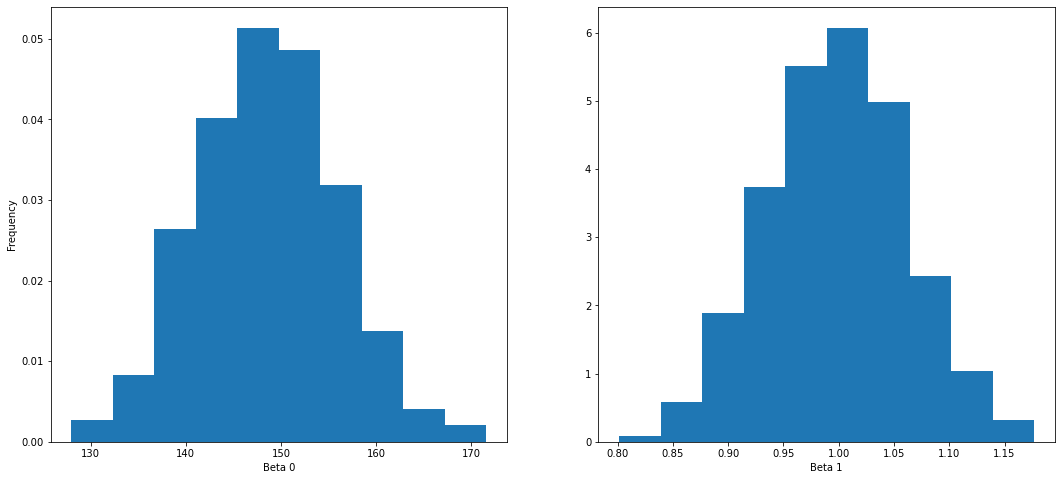

In [8]:
# plot histogram of beta0 and beta1
fig, ax = plt.subplots(1,2, figsize=(18,8))
ax[0].hist(beta0_list, density=True, bins=10);
#ax[0].___
ax[1].hist(beta1_list, density=True, bins=10);
#ax[1].___
ax[0].set_xlabel('Beta 0')
ax[1].set_xlabel('Beta 1')
ax[0].set_ylabel('Frequency');

### Compare the plots with the results from the RandomUniverse() function

In [9]:
beta0_randUni, beta1_randUni = [],[]

parallelUniverses = 1000

for i in range(parallelUniverses):
    df_new = RandomUniverse(df)
    
    xmean = df_new.tv.mean()
    ymean = df_new.sales.mean()

# Using Linear Algebra result as discussed in lecture
    beta1 = (((df_new.tv - xmean)*(df_new.sales - ymean)).sum())/(((df_new.tv - xmean)**2).sum())
    beta0 = ymean - beta1*xmean

    beta0_randUni.append(beta0)
    beta1_randUni.append(beta1)

In [10]:
def plotmulti(list1, list2):
    fig, axes = plt.subplots(1,2, figsize = (10,4), sharey = 'row')
    axes[0].hist(list1);
    axes[0].set_xlabel('Beta Distribution')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('Bootstrap')
    axes[1].hist(list2);
    axes[1].set_xlabel('Beta Distribution')
    axes[1].set_title('Random Universe')

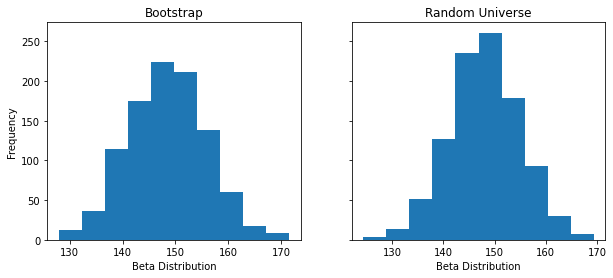

In [11]:
# Just use the 'plotmulti' function above to compare the two histograms for beta0
plotmulti(beta0_list, beta0_randUni)

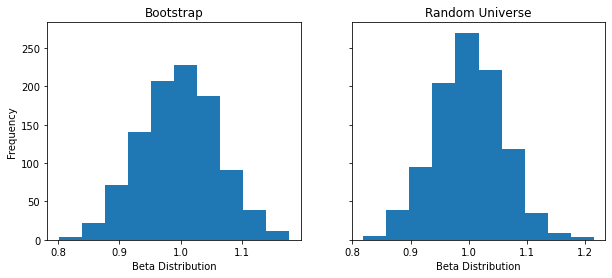

In [12]:
#Now compare for beta1
plotmulti(beta1_list, beta1_randUni)

# Fin

![Fin](https://media.giphy.com/media/jc1dl9ywZPryw/giphy.gif)